The hour with the maximum traffic volume is 9-10am
The hour with the minimum traffic volume is 12-1pm


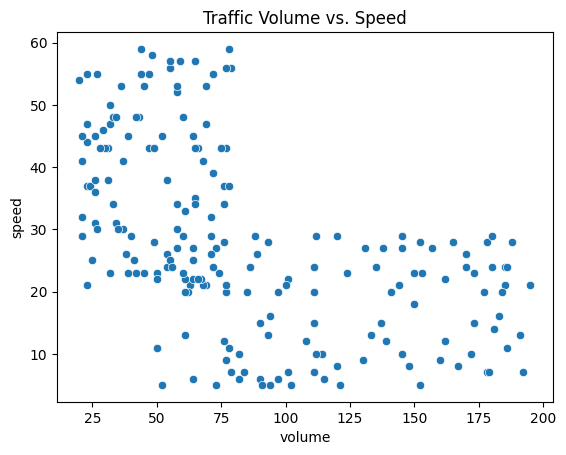

Rush Hour Model Coefficients: Intercept=13.473744867012496, Slope=0.027799356345282814


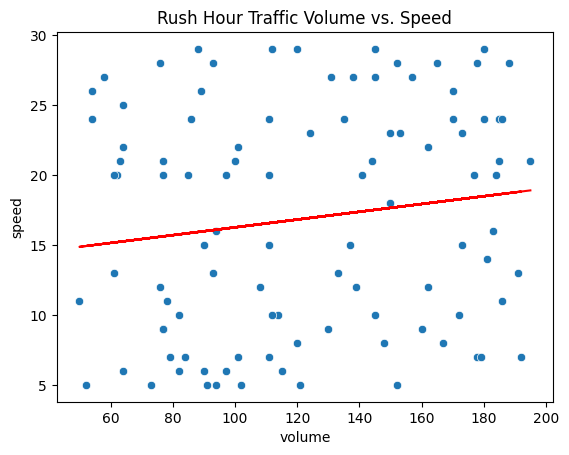

Non-Rush Hour Model Coefficients: Intercept=40.23293600113523, Slope=-0.033134667234284064


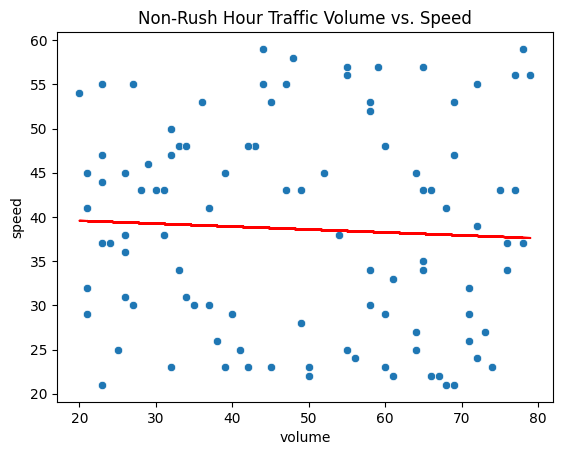

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Specify the CSV file paths
rush_hour_traffic_url = 'https://raw.githubusercontent.com/Percy-Agyei-Essiful/Traffic-Flow-Patterns-Kumasi-Case_study/main/rushHourTraffic.csv'
non_rush_hour_traffic_url = 'https://raw.githubusercontent.com/Percy-Agyei-Essiful/Traffic-Flow-Patterns-Kumasi-Case_study/main/nonrushHourTraffic.csv'

# Load the rush hour and non-rush hour traffic data from the CSV files
rush_hour_traffic = pd.read_csv(rush_hour_traffic_url)
non_rush_hour_traffic = pd.read_csv(non_rush_hour_traffic_url)

# Concatenate the rush hour and non-rush hour traffic data into a single dataframe
all_traffic = pd.concat([rush_hour_traffic, non_rush_hour_traffic])

# Calculate the average traffic volume by hour
hourly_traffic = all_traffic.groupby('time')['volume'].mean()

# Identify the hours with the maximum and minimum traffic volumes
max_hour = hourly_traffic.idxmax()
min_hour = hourly_traffic.idxmin()

# Print the hours with the maximum and minimum traffic volumes
print(f'The hour with the maximum traffic volume is {max_hour}')
print(f'The hour with the minimum traffic volume is {min_hour}')

# Create a scatter plot of traffic volume vs. speed for all data
sns.scatterplot(data=all_traffic, x='volume', y='speed')
plt.title('Traffic Volume vs. Speed')
plt.show()

# Fit a linear regression model to the rush hour traffic data
rush_hour_model = LinearRegression()
rush_hour_model.fit(rush_hour_traffic[['volume']], rush_hour_traffic['speed'])

# Print the coefficients of the rush hour traffic model
print(f'Rush Hour Model Coefficients: Intercept={rush_hour_model.intercept_}, Slope={rush_hour_model.coef_[0]}')

# Create a scatter plot of rush hour traffic volume vs. speed with the regression line
sns.scatterplot(data=rush_hour_traffic, x='volume', y='speed')
plt.plot(rush_hour_traffic['volume'], rush_hour_model.predict(rush_hour_traffic[['volume']]), color='red')
plt.title('Rush Hour Traffic Volume vs. Speed')
plt.show()

# Fit a linear regression model to the non-rush hour traffic data
non_rush_hour_model = LinearRegression()
non_rush_hour_model.fit(non_rush_hour_traffic[['volume']], non_rush_hour_traffic['speed'])

# Print the coefficients of the non-rush hour traffic model
print(f'Non-Rush Hour Model Coefficients: Intercept={non_rush_hour_model.intercept_}, Slope={non_rush_hour_model.coef_[0]}')

# Create a scatter plot of non-rush hour traffic volume vs. speed with the regression line
sns.scatterplot(data=non_rush_hour_traffic, x='volume', y='speed')
plt.plot(non_rush_hour_traffic['volume'], non_rush_hour_model.predict(non_rush_hour_traffic[['volume']]), color='red')
plt.title('Non-Rush Hour Traffic Volume vs. Speed')
plt.show()